In [1]:
# modules import
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

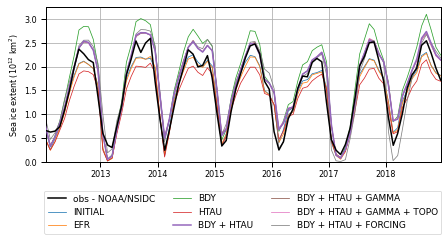

In [2]:
############################################### seaice extent #######################################################
sns.set_context('paper')
# data we used. you need to indicate the path
general_path = '/Users/jcaillet/Documents/nemo/'

year0 = 2012 # indicate the first year to draw

comparison_seaice_extent = general_path + 'AMUXL025/REFERENCE/seaice.pdf'

obs = general_path + 'AMUXL025/REFERENCE/REF01/REF01_obs_extent.pkl'
ref1 = general_path + 'AMUXL025/REFERENCE/REF01/REF01_extent.pkl'
ref2 = general_path + 'AMUXL025/REFERENCE/REF02_EFR010/REF02_extent.pkl'
ref3 = general_path + 'AMUXL025/REFERENCE/REF03_BDY/REF03_extent.pkl'
ref4 = general_path + 'AMUXL025/REFERENCE/REF05_HTAU60/REF05_extent.pkl'
ref5 = general_path + 'AMUXL025/REFERENCE/REF04_BDY_HTAU60/REF04_extent.pkl'
ref6 = general_path + 'AMUXL025/REFERENCE/REF06_GAMMA066/REF06_extent.pkl'
ref7 = general_path + 'AMUXL025/REFERENCE/REF07_TOPO_THW/REF07_extent.pkl'
ref8 = general_path + 'AMUXL025/REFERENCE/REF08_DFS52/REF08_tot_extent.pkl'

# open files
obs = pd.read_pickle(obs)
ref1 = pd.read_pickle(ref1)
ref2 = pd.read_pickle(ref2)
ref3 = pd.read_pickle(ref3)
ref4 = pd.read_pickle(ref4)
ref5 = pd.read_pickle(ref5)
ref6 = pd.read_pickle(ref6)
ref7 = pd.read_pickle(ref7)
ref8 = pd.read_pickle(ref8)

# year to draw
indexNames = obs[obs['time'].dt.year < year0].index
obs = obs.drop(indexNames, inplace = False)
# time centered to compared model and observations
obs['time_ok'] = obs['time'] + pd.DateOffset(days=15)
indexNames = ref1[ref1['time_centered'].dt.year < year0].index
ref1 = ref1.drop(indexNames, inplace = False)
indexNames = ref2[ref2['time_centered'].dt.year < year0].index
ref2 = ref2.drop(indexNames, inplace = False)
indexNames = ref3[ref3['time_centered'].dt.year < year0].index
ref3 = ref3.drop(indexNames, inplace = False)
indexNames = ref4[ref4['time_centered'].dt.year < year0].index
ref4 = ref4.drop(indexNames, inplace = False)
indexNames = ref5[ref5['time_centered'].dt.year < year0].index
ref5 = ref5.drop(indexNames, inplace = False)
indexNames = ref6[ref6['time_centered'].dt.year < year0].index
ref6 = ref6.drop(indexNames, inplace = False)
indexNames = ref7[ref7['time_centered'].dt.year < year0].index
ref7 = ref7.drop(indexNames, inplace = False)
indexNames = ref8[ref8['time_centered'].dt.year < year0].index
ref8 = ref8.drop(indexNames, inplace = False)


# figure
f = plt.figure(figsize = (7.08, 3.56))
ax={}
nb_rows = 1
nb_cols = 1
k=1
ax[k] = f.add_subplot(nb_rows,nb_cols, 1)
ax[k].plot(obs.time_ok, obs.surf / 10**12, color = 'black', label = 'obs - NOAA/NSIDC', linewidth=1.5, zorder=10)
ax[k].plot(ref1.time_centered, ref1.surf / 10**12, linewidth=0.75, label = 'INITIAL')
ax[k].plot(ref2.time_centered, ref2.surf / 10**12, linewidth=0.75, label = 'EFR')
ax[k].plot(ref2.time_centered, ref3.surf / 10**12, linewidth=0.75, label = 'BDY')
ax[k].plot(ref2.time_centered, ref4.surf / 10**12, linewidth=0.75, label = 'HTAU')
ax[k].plot(ref2.time_centered, ref5.surf / 10**12, linewidth=1.5, label = 'BDY + HTAU',zorder=9)
ax[k].plot(ref2.time_centered, ref6.surf / 10**12, linewidth=0.75, label = 'BDY + HTAU + GAMMA')
ax[k].plot(ref2.time_centered, ref7.surf / 10**12, linewidth=0.75, label = 'BDY + HTAU + GAMMA + TOPO')
ax[k].plot(ref2.time_centered, ref8.surf / 10**12, linewidth=0.75, label = 'BDY + HTAU + FORCING')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax[k].set_ylim(0,)
ax[k].set_xlim(ref1.time_centered.min(),ref1.time_centered.max())
plt.grid(True)
ax[k].set_ylabel('Sea ice extent (10$^{12}$ km$^{2}$)', fontsize = 8)
box = ax[k].get_position()
ax[k].set_position([box.x0, box.y0, box.width , box.height* 0.8])
# Put a legend to the right of the current axi
f.legend(bbox_to_anchor=(0.91, 0.03),  ncol=3, fontsize = 9)

f.savefig(comparison_seaice_extent, bbox_inches="tight")

plt.show()